#THE SPARKS FOUNDATION - GRIP
#DATA SCIENCE AND BUSINESS ANALYTICS
# NAME: MAYAKSHI

# **TASK 1 : Prediction Using Supervised ML**

Q) Predict the percentage of a student based on the no. of hours of study

Dataset:http://bit.ly/w-data

# **Step 1 :Import libraries.**

Start by importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Step 2 : Importing and reading the dataset**

Use pandas to load your dataset.

In [3]:
dataset = pd.read_csv("/content/student_scores - student_scores.csv")
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#the first five values in the dataset
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#number of rows and columns
dataset.shape

(25, 2)

# **Step 3: Exploratory Data Analysis (EDA)**
Understand the Dataset: Check for missing values, data types, and basic statistics.

Visualize the Data: Plot the data to understand the relationships between variables.

In [6]:
# Check for missing values
print(dataset.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Visualization**

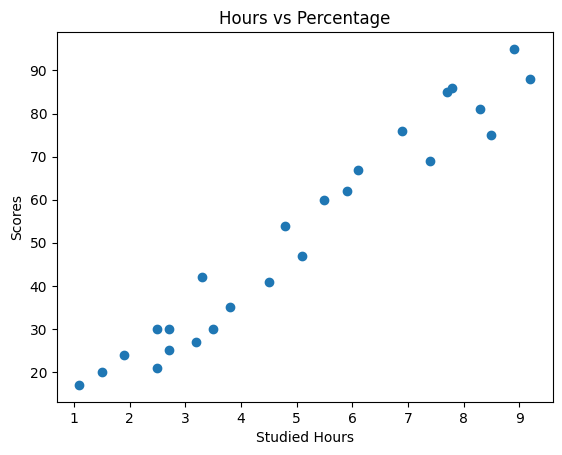

In [8]:
#Hours Vs Percentage of Scores
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

# **Step 4: Prepare the Data for Training**
Select Features and Labels: Separate the independent variable (hours studied) and the dependent variable (scores).

Split the Dataset: Use train_test_split to split the data into training and testing sets.

In [9]:
#X will take all the values except for the last column which is our dependent variable (target variable)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# **Step 5: Train the Model**
Create a Linear Regression Model: Instantiate and fit the model using the training data.

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

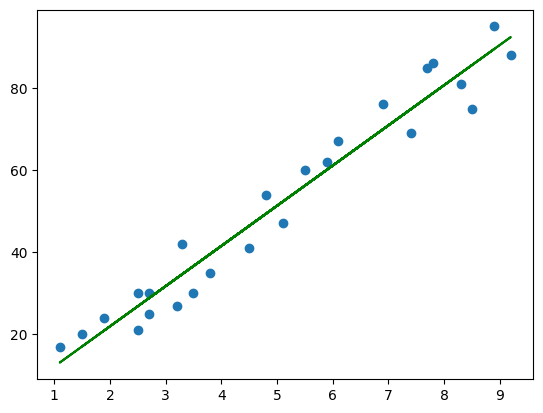

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color = 'green');
plt.show()

# **Step 6: Make Predictions**
Predict Scores: Use the trained model to make predictions on the test data

In [13]:
#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


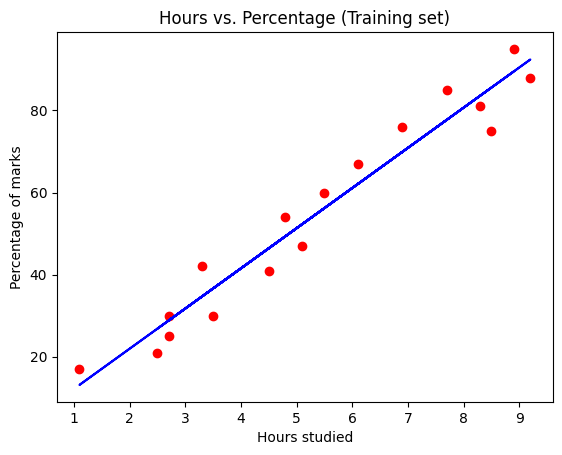

In [14]:
#Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

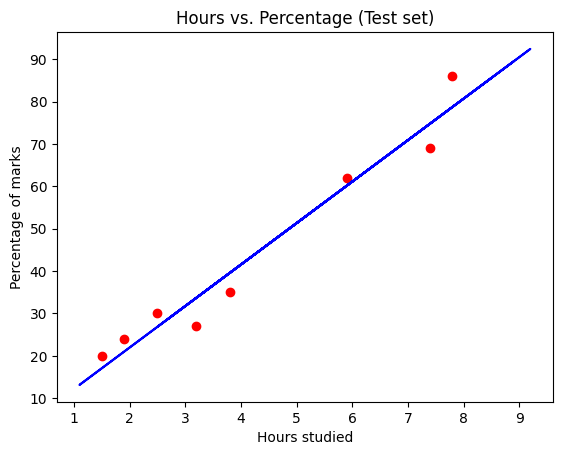

In [15]:
#Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

# **Step 7: Evaluate the Model**
Compare Actual vs Predicted Values: Create a dataframe to compare actual and predicted values.

Calculate Error Metrics: Use MAE, MSE, and RMSE to evaluate the model's performance.

In [16]:
#Comparing the actual values with the predicted ones.
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [17]:
#predicting the score
dataset = np.array(9.25)
dataset = dataset.reshape(-1, 1)
pred = regressor.predict(dataset)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [92.91505723].


In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027651


In [19]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(y_test,y_pred))

The R-Square of the model is:  0.9568211104435257


**Conclusion:**

We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91